In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import animation
# import seaborn as sns
# from scipy.optimize import curve_fit
plt.style.use("dark_background")

$\Large The \ Graphical \ Representation$

In [2]:
def graphic_bd(num_bins: int=200, num_particles: int=100_000, color_change: int=10_000, num_colors: int=3):
    """
    Generates Graphical Data for Ballistic Deposition.
    
    num_bins, num_particles: The parameters of the ballistic deposition are determined.

    color_change: The color of the graph will change every time this many particles are deposited.

    num_colors: The number of colors that will be used to plot the points.
    """


    # The height of every bin will be changed randomly with the deposition of a particle at every instance of time.
    h = np.zeros(num_bins, dtype=int)
    
    # The pixels that will be used to graph the image are initialized to zero:
    image_matrix = np.zeros((num_particles, num_bins), dtype=int)
    # The main part of the code:
    for i in range(num_particles):
        bin = np.random.randint(num_bins)
        # Change the color of the particles.
        # +1, so that it won't be the same as the background color.
        if (i%color_change)==0:
            color = int(((i//color_change) % num_colors) + 1)
        # Check the height of the neighbors and decide accordingly:
        if h[bin] < h[(bin-1)%num_bins] or h[bin] < h[(bin+1)%num_bins]:
            h[bin] = max(h[(bin-1)%num_bins], h[(bin+1)%num_bins])
        else:
            # With the deposition of a particle, the height of the bin increases by 1:
            h[bin] += 1
        # The matrix of the pixels of the image is filled with [0,1,2,...,num_colors] for determining the color:
        image_matrix[h[bin], bin] = color
    return image_matrix

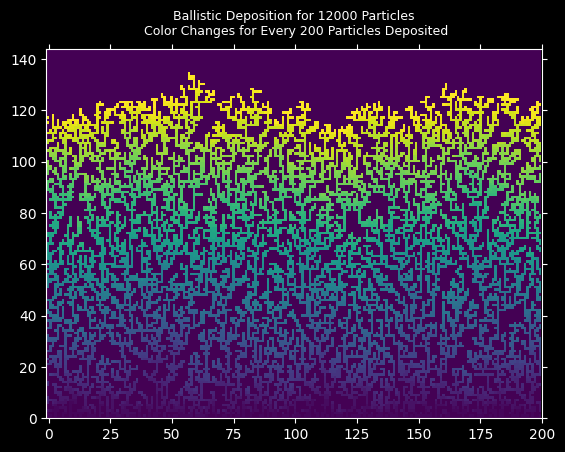

In [30]:
# The plot is initialized:
fig, ax = plt.subplots()
ax.clear()
num_bins = 200
num_particles = 12_000
color_change = 200

image_matrix = graphic_bd(color_change=color_change, num_colors=60, num_particles=num_particles)
# plt.imshow() is very efficient and significantly faster than other plotting methods.
ax.imshow(image_matrix, aspect="auto", interpolation="nearest")
ax.set_xlim((-1,num_bins))
ax.set_ylim(0, np.nonzero(image_matrix)[0][-1]+10)
ax.set_title(f"Ballistic Deposition \
for {num_particles} Particles\n \
Color Changes for Every {color_change} Particles Deposited", fontsize=9, pad=10);

In [29]:
# fig.savefig("BDGraphic6.jpg")

$\large Calculating \ the \ Numerical \ Data \ from \ the \ Deposition \ Model$

In [68]:
def numeric_bd(num_bins=200, num_particles=100_000, num_snap_shots=100, log_snapshots=False):
    """
    Generates Data for Ballistic Deposition.
    
    num_bins, num_particles: The parameters of the ballistic deposition are determined.

    num_snap_shots: It is the number of snapshots we take to study the layers;
    in other words, at most this many points will be on the scatter plot.
    If log_snapshots is True, snapshots will be taken in intervals that increase with the power of 2.
    """
    index = 0
    # The height of every bin will be changed randomly with the deposition of a paricle at every instance of time.
    h = np.zeros(num_bins, dtype=int)
    scatter_matrix = np.zeros((num_snap_shots, num_bins))
    
    # The main part of the code:
    for i in range(num_particles):
        bin = np.random.randint(num_bins)
        # Check the height of the neighbors and decide accordingly:     
        if h[bin] < h[(bin-1)%num_bins] or h[bin] < h[(bin+1)%num_bins]:
            h[bin] = max(h[(bin-1)%num_bins], h[(bin+1)%num_bins])
        else:
            # With the deposition of a particle, the height of the bin increases by 1:
            h[bin] += 1
        
        # Take 100 (or num_snap_shots) snapshots from h and put in scatter_matrix:
        # Logarithmic snapshots maybe taken which means after depositing 2, 4, 8, 16, ... layers, one snapshot
        # is taken.
        if log_snapshots:
            if(i == np.power(2, (index+1))):
                scatter_matrix[index] = h
                index += 1
        else:
            if((i+1)%(num_particles//num_snap_shots) == 0):
                scatter_matrix[index] = h
                index += 1

        
    return scatter_matrix

In [69]:
"""
Mean height and SD for 4 layers (every 250,000 particles):
"""

num_snap_shots = 4
scatter_matrix = numeric_bd(num_particles=1_000_000, num_snap_shots=num_snap_shots)

for i in range(num_snap_shots):
    print(f"mean height after deposition of {25000*(i+1)} particles:\
                {np.mean(scatter_matrix, axis=1)[i]}")
    print(f"standard deviation after deposition of {25000*(i+1)} particles:\
         {np.std(scatter_matrix, axis=1)[i]}")
    print("\n\n")

mean height after deposition of 25000 particles:                2646.99
standard deviation after deposition of 25000 particles:         5.207677025315606



mean height after deposition of 50000 particles:                5310.6
standard deviation after deposition of 50000 particles:         7.932212806020777



mean height after deposition of 75000 particles:                7969.2
standard deviation after deposition of 75000 particles:         8.041144197189851



mean height after deposition of 100000 particles:                10612.165
standard deviation after deposition of 100000 particles:         4.880345786929447





In [135]:
"""
Plot the data for 1M particles and try to fit. (1M takes 30 seconds.)
"""


num_samples = 10
num_particles = 1_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd(num_particles=num_particles,
                                             num_snap_shots=num_snap_shots,
                                             log_snapshots=True), axis=1)


y_L200 = np.log2(np.mean(matrix_10_100, axis=0))
x_L200 = np.arange(1, num_snap_shots+1)

In [137]:
print(f"Number of points on the scatter plot: {x_L200.shape[0]}")

Number of points on the scatter plot: 19


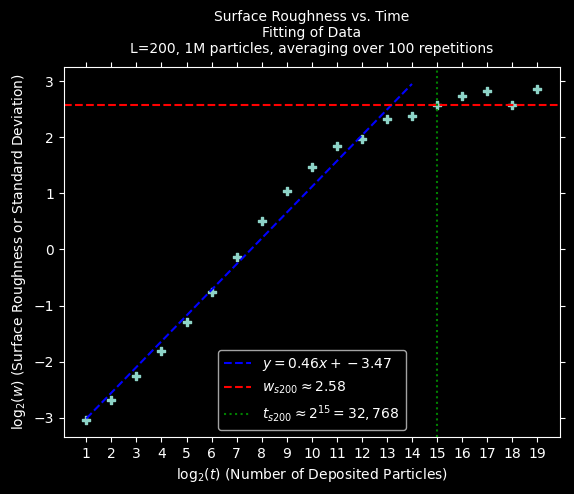

In [139]:
"""
Plotting the data and fitting the lines for 1M particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L200[:-5], y_L200[:-5], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L200[:-5], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L200,y_L200, marker="P")

ax.plot(x_L200[:-5], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L200[14], color="red", linestyle="--",
            label=f"$w_{{s200}} \\approx {y_L200[14]:.2f}$")

ax.axvline(x_L200[14], color="green", linestyle=":", label="$t_{s200} \\approx 2^{15} = 32,768$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=200, 1M particles, averaging over 100 repetitions",
            fontsize=10, pad=10)
ax.set_xticks(x_L200)
ax.legend();

In [140]:
# fig.savefig("BDL200.jpg")

$\large Repeat \ the \ process \ and \ find \ w_s \ and \ t_s \ for \ different \ values \ of \ L.$

In [141]:
"""
L = 300 (1M particles takes 30 seconds)
"""


num_bins = 300
num_samples = 10
num_particles = 1_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd(num_bins=num_bins,
                                         num_particles=num_particles,
                                         num_snap_shots=num_snap_shots,
                                         log_snapshots=True), axis=1)


y_L300 = np.log2(np.mean(matrix_10_100, axis=0))
x_L300 = np.arange(1, num_snap_shots+1)

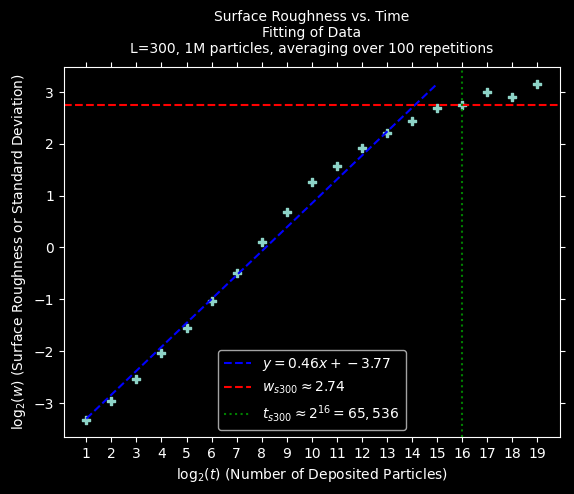

In [144]:
"""
Plotting the data and fitting the lines for 1M particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L300[:-4], y_L300[:-4], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L300[:-4], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L300,y_L300, marker="P")

ax.plot(x_L300[:-4], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L300[15], color="red", linestyle="--",
            label=f"$w_{{s300}} \\approx {y_L300[15]:.2f}$")

ax.axvline(x_L300[15], color="green", linestyle=":", label="$t_{s300} \\approx 2^{16} = 65,536$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=300, 1M particles, averaging over 100 repetitions",
            fontsize=10, pad=10)
ax.set_xticks(x_L300)
ax.legend();

In [145]:
# fig.savefig("BDL300.jpg")

In [148]:
"""
L = 150 (1M particles, 30 seconds)
"""


num_bins = 150
num_samples = 10
num_particles = 1_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd(num_bins=num_bins,
                                         num_particles=num_particles,
                                         num_snap_shots=num_snap_shots,
                                         log_snapshots=True), axis=1)


y_L150 = np.log2(np.mean(matrix_10_100, axis=0))
x_L150 = np.arange(1, num_snap_shots+1)

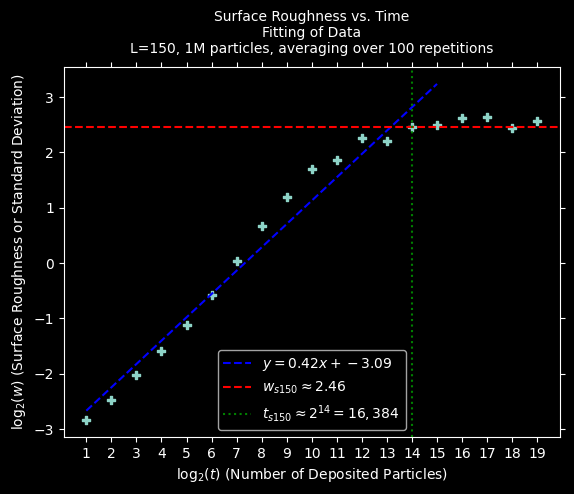

In [150]:
"""
Plotting the data and fitting the lines for 1M particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L150[:-4], y_L150[:-4], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L150[:-4], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L150,y_L150, marker="P")

ax.plot(x_L150[:-4], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L150[13], color="red", linestyle="--",
            label=f"$w_{{s150}} \\approx {y_L150[13]:.2f}$")

ax.axvline(x_L150[13], color="green", linestyle=":", label="$t_{s150} \\approx 2^{14} = 16,384$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=150, 1M particles, averaging over 100 repetitions",
            fontsize=10, pad=10)
ax.set_xticks(x_L150)
ax.legend();

In [151]:
# fig.savefig("BDL150.jpg")

In [163]:
"""
L = 100 (1M particles, 30 seconds)
"""


num_bins = 100
num_samples = 10
num_particles = 1_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd(num_bins=num_bins,
                                         num_particles=num_particles,
                                         num_snap_shots=num_snap_shots,
                                         log_snapshots=True), axis=1)


y_L100 = np.log2(np.mean(matrix_10_100, axis=0))
x_L100 = np.arange(1, num_snap_shots+1)

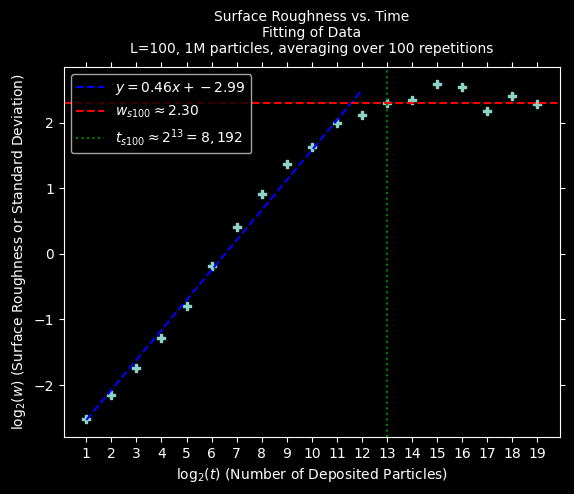

In [169]:
"""
Plotting the data and fitting the lines for 500,000 particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L100[:-7], y_L100[:-7], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L100[:-7], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L100,y_L100, marker="P")

ax.plot(x_L100[:-7], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L100[12], color="red", linestyle="--",
            label=f"$w_{{s100}} \\approx {y_L100[12]:.2f}$")

ax.axvline(x_L100[12], color="green", linestyle=":", label="$t_{s100} \\approx 2^{13} = 8,192$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=100, 1M particles, averaging over 100 repetitions",
            fontsize=10, pad=10)
ax.set_xticks(x_L100)
ax.legend();

In [170]:
# fig.savefig("BDL100.jpg")

In [187]:
"""
L = 50 (1M particles, 30 seconds)
"""


num_bins = 50
num_samples = 10
num_particles = 1_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd(num_bins=num_bins,
                                         num_particles=num_particles,
                                         num_snap_shots=num_snap_shots,
                                         log_snapshots=True), axis=1)


y_L50 = np.log2(np.mean(matrix_10_100, axis=0))
x_L50 = np.arange(1, num_snap_shots+1)

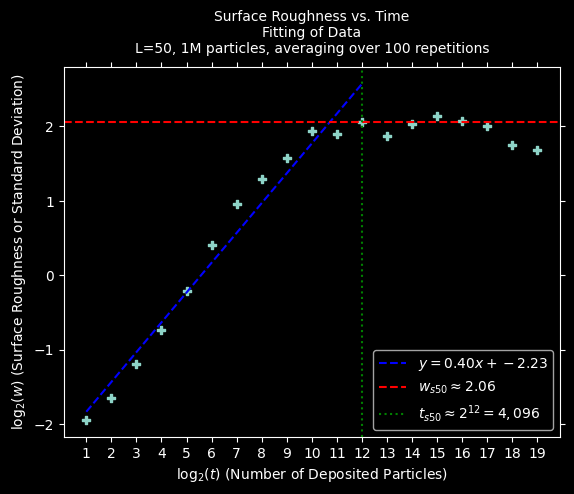

In [188]:
"""
Plotting the data and fitting the lines for 500,000 particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L50[:-7], y_L50[:-7], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L50[:-7], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L50,y_L50, marker="P")

ax.plot(x_L50[:-7], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L50[11], color="red", linestyle="--",
            label=f"$w_{{s50}} \\approx {y_L50[11]:.2f}$")

ax.axvline(x_L50[11], color="green", linestyle=":", label="$t_{s50} \\approx 2^{12} = 4,096$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=50, 1M particles, averaging over 100 repetitions",
            fontsize=10, pad=10)
ax.set_xticks(x_L50)
ax.legend();

In [189]:
# fig.savefig("BDL50.jpg")

In [196]:
"""
L = 20 (1M particles, 30 seconds)
"""


num_bins = 20
num_samples = 10
num_particles = 1_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd(num_bins=num_bins,
                                         num_particles=num_particles,
                                         num_snap_shots=num_snap_shots,
                                         log_snapshots=True), axis=1)


y_L20 = np.log2(np.mean(matrix_10_100, axis=0))
x_L20 = np.arange(1, num_snap_shots+1)

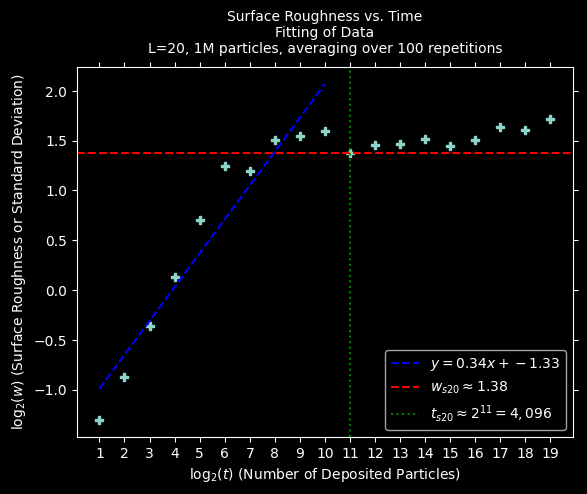

In [192]:
"""
Plotting the data and fitting the lines for 500,000 particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L20[:-9], y_L20[:-9], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L20[:-9], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L20,y_L20, marker="P")

ax.plot(x_L20[:-9], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L20[10], color="red", linestyle="--",
            label=f"$w_{{s20}} \\approx {y_L20[10]:.2f}$")

ax.axvline(x_L20[10], color="green", linestyle=":", label="$t_{s20} \\approx 2^{11} = 4,096$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=20, 1M particles, averaging over 100 repetitions",
            fontsize=10, pad=10)
ax.set_xticks(x_L20)
ax.legend();

In [193]:
# fig.savefig("BDL20.jpg")

$\Large Plotting \ L, \ w_s \ and \ t_s \ and \ finding \ \alpha, \ \beta, \ z$

In [203]:
ws_list = [y_L20[10], y_L50[11], y_L100[12], y_L150[13], y_L200[14], y_L300[15]]
ts_list = np.array([x_L20[10], x_L50[11], x_L100[12], x_L150[13], x_L200[14], x_L300[15]], dtype=float)
Ls_list = np.log2([20, 50, 100, 150, 200, 300])

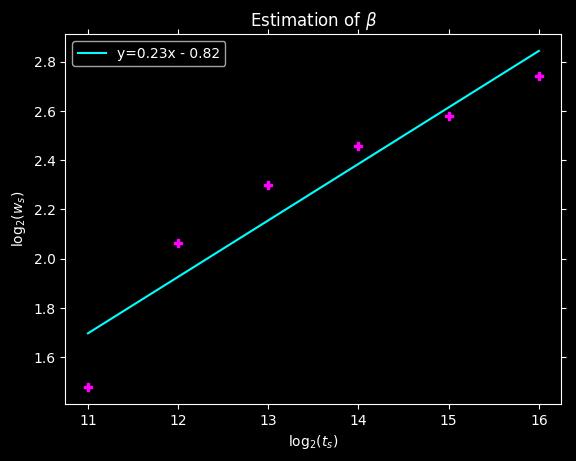

In [204]:
"""
Estimating beta:
"""


# Fitting data and obtaining beta:
beta_coefs = np.polynomial.polynomial.polyfit(ts_list, ws_list, deg=1)
# Plotting:
fig, ax = plt.subplots()
ax.clear()
ax.scatter(ts_list, ws_list, marker="P", color="fuchsia")
ax.plot(ts_list, beta_coefs[0]+beta_coefs[1]*ts_list, color="aqua",
        label=f"y={beta_coefs[1]:.2f}x - {abs(beta_coefs[0]):.2f}")
ax.set_xlabel("$\\log_2({t_s})$")
ax.set_ylabel("$\\log_2({w_s})$")
ax.set_title("Estimation of $\\beta$")
ax.legend();

In [205]:
fig.savefig("BDBeta.jpg")

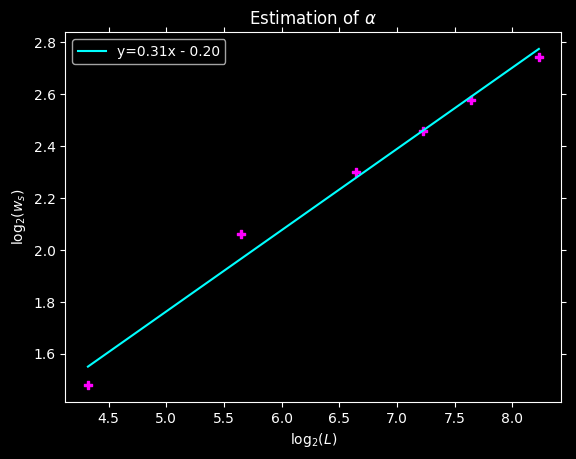

In [208]:
"""
Estimating alpha:
"""


# Fitting data and obtaining beta:
alpha_coefs = np.polynomial.polynomial.polyfit(Ls_list, ws_list, deg=1)
# Plotting:
fig, ax = plt.subplots()
ax.clear()
ax.scatter(Ls_list, ws_list, marker="P", color="fuchsia")
ax.plot(Ls_list, alpha_coefs[0]+alpha_coefs[1]*Ls_list, color="aqua",
        label=f"y={alpha_coefs[1]:.2f}x - {abs(alpha_coefs[0]):.2f}")
ax.set_xlabel("$\\log_2({L})$")
ax.set_ylabel("$\\log_2({w_s})$")
ax.set_title("Estimation of $\\alpha$")
ax.legend();

In [209]:
fig.savefig("BDAlpha.jpg")

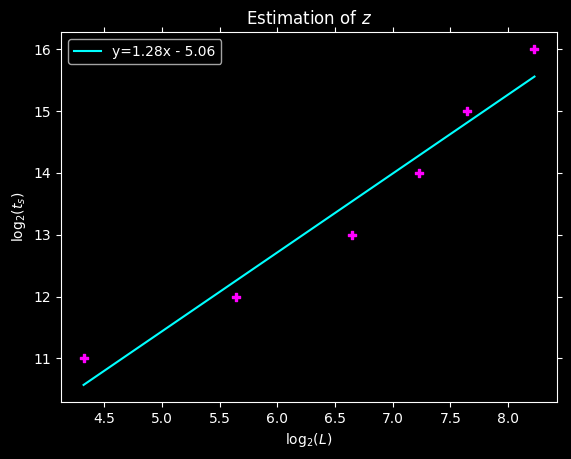

In [214]:
"""
Estimating z*beta:
"""


# Fitting data and obtaining beta:
zbeta_coefs = np.polynomial.polynomial.polyfit(Ls_list, ts_list, deg=1)
# Plotting:
fig, ax = plt.subplots()
ax.clear()
ax.scatter(Ls_list, ts_list, marker="P", color="fuchsia")
ax.plot(Ls_list, zbeta_coefs[0]+zbeta_coefs[1]*Ls_list, color="aqua",
        label=f"y={zbeta_coefs[1]:.2f}x - {abs(zbeta_coefs[0]):.2f}")
ax.set_xlabel("$\\log_2({L})$")
ax.set_ylabel("$\\log_2({t_s})$")
ax.set_title("Estimation of $z$")
ax.legend();

In [216]:
# fig.savefig("BDZ.jpg")

In [213]:
z = alpha_coefs[1] / beta_coefs[1]
print(f"alpha = {alpha_coefs[1]}\n\
beta = {beta_coefs[1]}\n\
z = {z}")

alpha = 0.3134441948187659
beta = 0.22916173045618107
z = 1.3677859483553725
